<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-(EDA)" data-toc-modified-id="Исследовательский-анализ-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ (EDA)</a></span><ul class="toc-item"><li><span><a href="#Размер-датасета" data-toc-modified-id="Размер-датасета-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Размер датасета</a></span></li><li><span><a href="#Изучим-средние-значения-и-стандартные-отклонения" data-toc-modified-id="Изучим-средние-значения-и-стандартные-отклонения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучим средние значения и стандартные отклонения</a></span></li><li><span><a href="#Распределение-численных-признаков" data-toc-modified-id="Распределение-численных-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Распределение численных признаков</a></span></li><li><span><a href="#Распределение-категориальных-признаков" data-toc-modified-id="Распределение-категориальных-признаков-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Распределение категориальных признаков</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Матрица корреляций</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Доля-оттока-по-каждому-кластеру" data-toc-modified-id="Доля-оттока-по-каждому-кластеру-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Доля оттока по каждому кластеру</a></span></li><li><span><a href="#Распределения-признаков-для-кластеров" data-toc-modified-id="Распределения-признаков-для-кластеров-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Распределения признаков для кластеров</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Описание проекта

Сеть фитнес-центров "Культурист-датасаентист" хочет разработать стратегию по взаимодействию с клиентами для борьбы с оттоком. 

**Цель исследования:**

 - спрогнозировать вероятность оттока для каждого клиента;
 - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
 - проанализировать основные признаки, наиболее сильно влияющие на отток;
 - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1. выделить целевые группы клиентов;
    2. предложить меры по снижению оттока;
    3. определить другие особенности взаимодействия с клиентами

## Описание данных

Таблица включает данные на месяц до оттока и факт оттока на определённый месяц. 

Набор данных включает следующие поля:

**Данные клиента за предыдущий до проверки факта оттока месяц:**
 - 'gender' — пол;
 - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
 - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
 - 'Phone' — наличие контактного телефона;
 - 'Age' — возраст;
 - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
 
**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**
 - 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
 - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
 - 'Group_visits' — факт посещения групповых занятий;
 - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
 - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
 - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
 - 'Churn' — факт оттока в текущем месяце.

## Загрузка данных

In [1]:
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import itertools 

pd.options.display.max_colwidth = 210

In [2]:
df = pd.read_csv('gym_churn.csv')

## Исследовательский анализ (EDA)

### Размер датасета

In [3]:
df.shape

(4000, 14)

Всего 4 тыс. наблюдений и 14 полей - 13 признаков и 1 целевая переменная

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В таблице представлено два типа данных - категориальный и численный. 
К категориальным относятся `gender`, `Near_location`, `Partner`, `Promo_friends`, `Phone`, `Group_visits`, `Churn`.

Пропусков нет

### Изучим средние значения и стандартные отклонения

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


 - В выборке представлено примерно поровну клиентов обоих полов
 - 85% клиентов живут неподалеку от фитнес - центра
 - Примерно половина из всех клиентов являются сотрудниками компании - партнёра
 - 31% клиентов пришли по знакомству
 - 90% клиентов оставили контактный телефон
 - 41% клиентов ходят на групповые занятия
 - отток клиентов в текущем месяце составляет 26%
 - Средний возраст клиента - 29 лет, максимальный - 41
 - Средние траты на доп услуги 147 руб, что несколько больше медианы. Это свидетельствует  от том, что есть немного но очень больших трат.
 - В среднем lifetime клиента 3.7 месяца медиана - три ровно.
 - Среднее посещение составляет 1.9 занятий в неделю. Максимальное количество тренировок - 6.

In [37]:
#колонки с числовыми признаками
cols=df.drop(columns=['gender' ,'Near_Location', 'Partner','Promo_friends','Phone', 'Group_visits'])

In [38]:
#колонки с категориальными признаками
bi_cols=df[['gender' ,'Near_Location', 'Partner','Promo_friends','Phone', 'Group_visits']]

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [39]:
df_churn = cols.groupby('Churn').agg({'mean'}).T
df_churn

,Churn,0,1
Contract_period,mean,5.747193,1.728558
Age,mean,29.976523,26.989632
Avg_additional_charges_total,mean,158.445715,115.082899
Month_to_end_contract,mean,5.283089,1.662582
Lifetime,mean,4.711807,0.990575
Avg_class_frequency_total,mean,2.024876,1.474995
Avg_class_frequency_current_month,mean,2.027882,1.044546


 - те, кто остался - в среднем старше, тратят больше на дополнительные услуги клуба и регулярно посещают по 2 тренировки в неделю
 - lifetime тех, кто остался составляет 4.7 месяцев. 
 - В среднем те, кто остаются находятся в начале своего абонемента - 5.3 месяца до конца абонемента дисциплинируют.
 - В среднем уходят клиенты после 1 месяца посещения. Возможно, после окончания периода по скидке или пробного периода.
 - У ушедших в среднем меньше двух месяцев до конца срока действия абонемента.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

### Распределение численных признаков

In [40]:
column_list = cols.columns

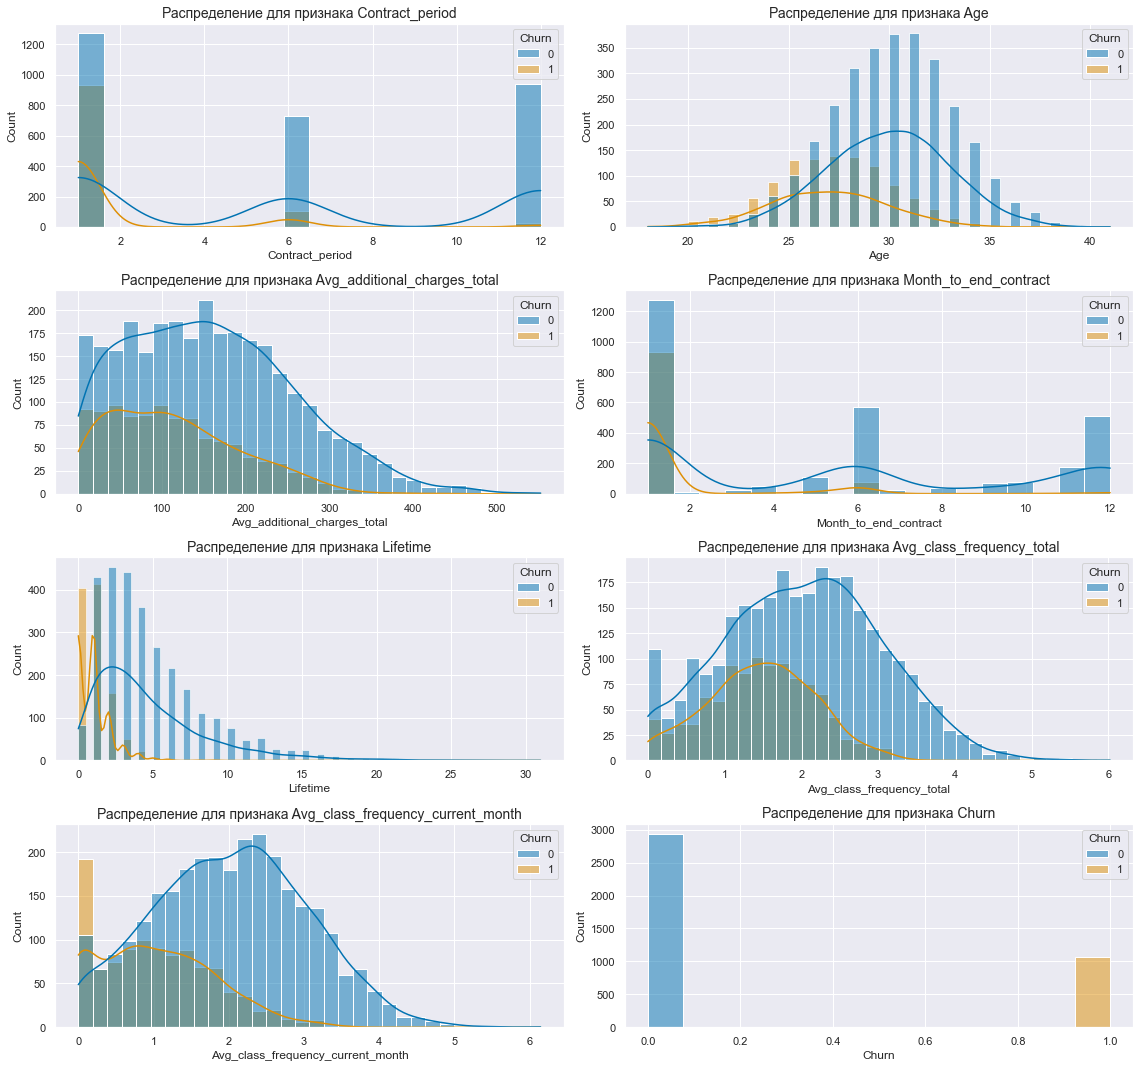

In [47]:
fig,axes = plt.subplots(4,2,figsize=(16,15))
axes = axes.ravel()

for i, ax in zip(column_list,axes):
    sns.histplot(data=df, x=df[i], ax=ax, palette='colorblind', hue='Churn', kde=True)
    ax.set_title('Распределение для признака ' + i, fontsize=14)
    
fig.tight_layout()
plt.show()

 Помимо выводов из таблицы describe мы видим следующие инсайты:
 - Contract_period - это длительность текущего действующего абонемента, она может быть месяц, 6 месяцев или год. Те, кто ушел, редко берут долгие абонементы
 - Редко уходят, когда остаётся много месяцев в абонементе. Всплеск уходящих на 2 месяцах до конца абонемента
 - Lifetime клиента редко превышает 15 месяцев

### Распределение категориальных признаков

In [42]:
bi_column_list = bi_cols.columns

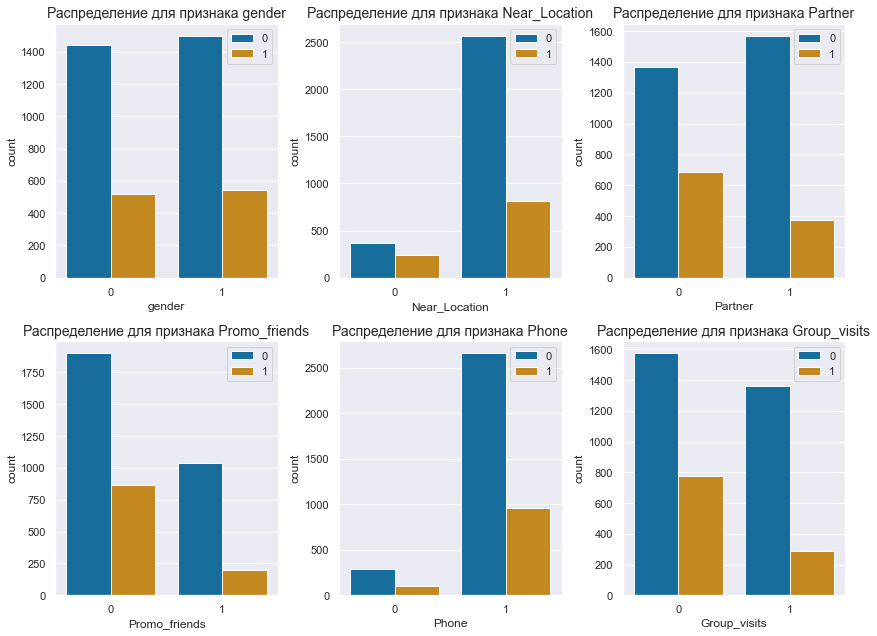

In [50]:
fig,axes = plt.subplots(2,3, figsize=(12,9))

axes_list = [item for sublist in axes for item in sublist]
for i in bi_column_list:
    ax=axes_list.pop(0)
    sns.countplot(data=df, x=i, ax=ax, palette='colorblind', hue='Churn')
    ax.set_title('Распределение для признака ' + i, fontsize=14)
    ax.legend()
    
fig.tight_layout()
plt.show()

 - отток клиентов не зависит от `gender`
 - отношение оставшихся из тех, кто живёт неподалёку от фитнес - центра выше
 - отток выше среди тех, кто пришёл не от компании
 - тех, кто пришёл по промо меньше. Из тех, кто пришёл по промо остаётся больше, чем уходит
 - тех, кто не оставил свой номер телефона очень мало, трудно сказать, как сильно это влияет на отток. 
 - групповые занятия положительно влияют на удержание клиентов

### Матрица корреляций

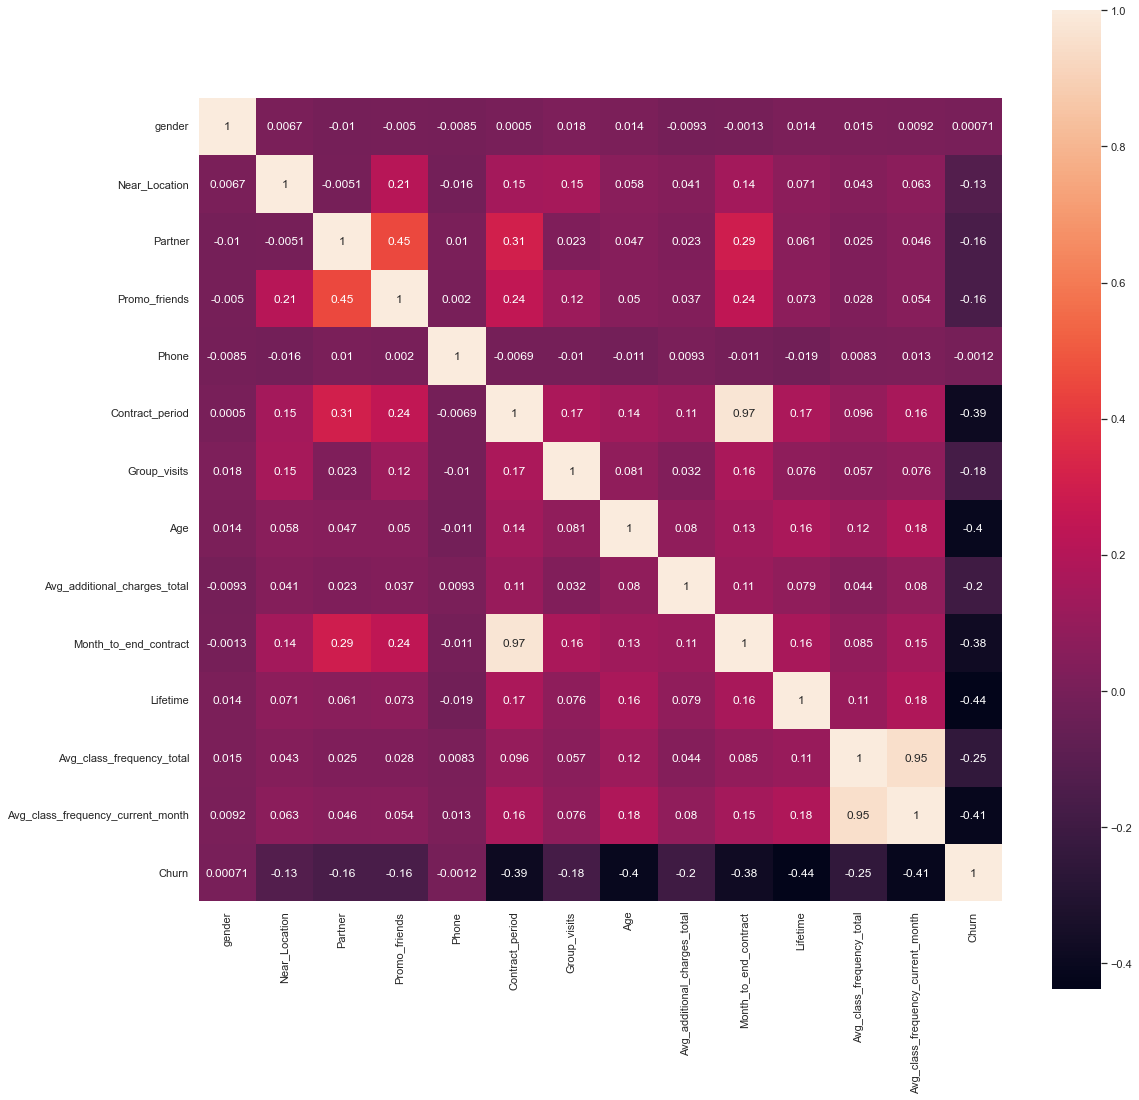

In [18]:
cm = df.corr() #вычисляем матрицу корреляций
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)
sns.set(rc = {'figure.figsize':(16,16)})
plt.show()

 - признаки `avg_class_frequency_current_month` и `avg_class_frequency_total` наиболее сильно коррелируют между собой, так же как и `month_to_end_contract` и `contract_period`. Lля линейных моделей взаимная корреляция нежелательна, поэтому эти признаки при построении модели придётся исключить
 - с целевой переменной сильно коррелириующих признаков нет

## Модель прогнозирования оттока клиентов

In [51]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y) и исключим признаки, которые сильно коррелируют между собой
X = df.drop([
    'Churn',
    'Month_to_end_contract',
    'Avg_class_frequency_current_month'
], axis=1)
y = df['Churn']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Чтобы для обучения модели можно было использовать линейную регрессию, нужна стандартизация признаков.

In [53]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [54]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [55]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81
	F1: 0.80
	ROC_AUC: 0.95


In [56]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions, 
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.79
	Recall: 0.76
	F1: 0.77
	ROC_AUC: 0.94


Модель логичстическо регрессии даёт наилучшие метрики, она прогнозирует правильно 90% ответов. Метрика ROUC 0.95, значит модель неплохое качество классификации

## Кластеризация клиентов

In [57]:
#отложим столбец с оттоком
df_sс = df.drop([
    'Churn',
    'Month_to_end_contract',
    'Avg_class_frequency_current_month'
], axis=1)

In [58]:
# обязательная стандартизация данных перед работой с алгоритмами
df_sc = StandardScaler()
X_sc = df_sc.fit_transform(X)

In [59]:
linked = linkage(X_sc, method = 'ward')

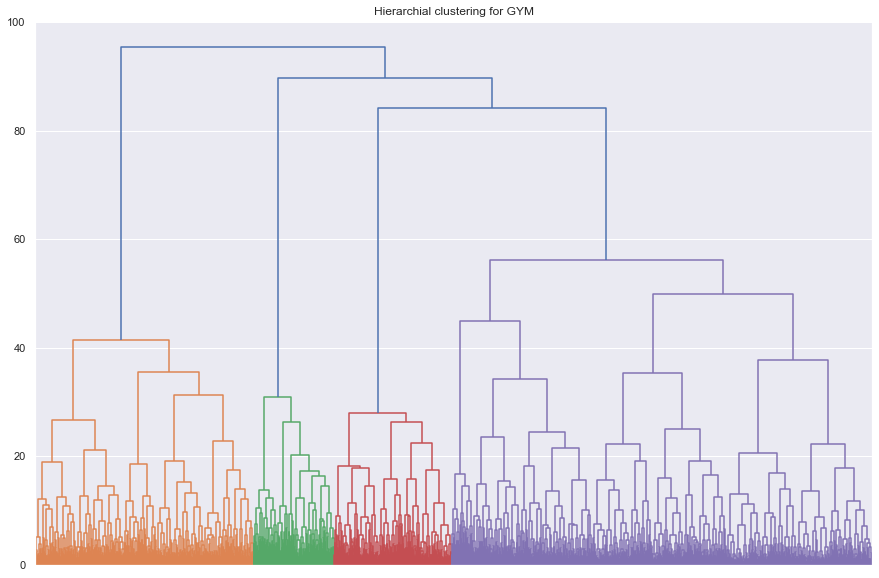

In [60]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Иерархия кластеров для клиентов фитнес-центра')
plt.show() 

In [61]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [62]:
# сохраняем метки кластера в поле нашего датасета
df['cluster'] = labels

In [63]:
# выводим статистику по средним значениям наших признаков по кластеру
clusters= df.groupby(['cluster']).mean().T
clusters

cluster,0,1,2,3,4
gender,0.499109,0.488571,0.505300,0.544202,0.523316
Near_Location,0.000000,0.995238,1.000000,1.000000,0.862694
Partner,0.488414,0.955238,0.238516,0.250287,0.471503
Promo_friends,0.076649,0.892381,0.059187,0.079219,0.305699
Phone,1.000000,1.000000,1.000000,1.000000,0.000000
Contract_period,3.032086,7.660952,2.819788,4.528129,4.777202
Group_visits,0.235294,0.458095,0.000000,1.000000,0.427461
Age,28.721925,29.543810,28.770318,29.536165,29.297927
Avg_additional_charges_total,137.540009,155.861428,143.383993,148.088897,144.208179
Month_to_end_contract,2.853832,6.988571,2.650177,4.165327,4.466321


В кластере под номером 1 наиболее высокий churn rate - 40%, туда попали клиенты: 

 - с `gender` 0 около 49.9%, 
 - живущие не поблизости от фитнес-центра. 
 - не пришли по промо 
 - лишь 20% из них выбирали групповые тренировки. 
 - В среднем посещают 1.77 тренировки в неделю 
 - в среднем с клубом на протяжении трёх месяцев.
 - имеют менее 3х месяцев до конца контракта
 
В кластере 2 churn rate наименьший, для клиентов этого кластера характерно следующее:
 - `gender` 0 ещё меньше - около 48.9%
 - почти всегда живут рядом с фитнес-центром
 - почти 95% работают в компании - партнёре
 - почти в 90% пришли по приглашению друга или промо акции
 - имеют самые длинные договора по сравнению с клиентами из других кластеров - более семи месяцев
 - почти половина посещает групповые занятия
 - почти 2 раза в неделю посещают тренировкам в фитнесе
 - они уже более трёх месяцев в клубе и до конца договора им ещё тоже далеко

### Доля оттока по каждому кластеру

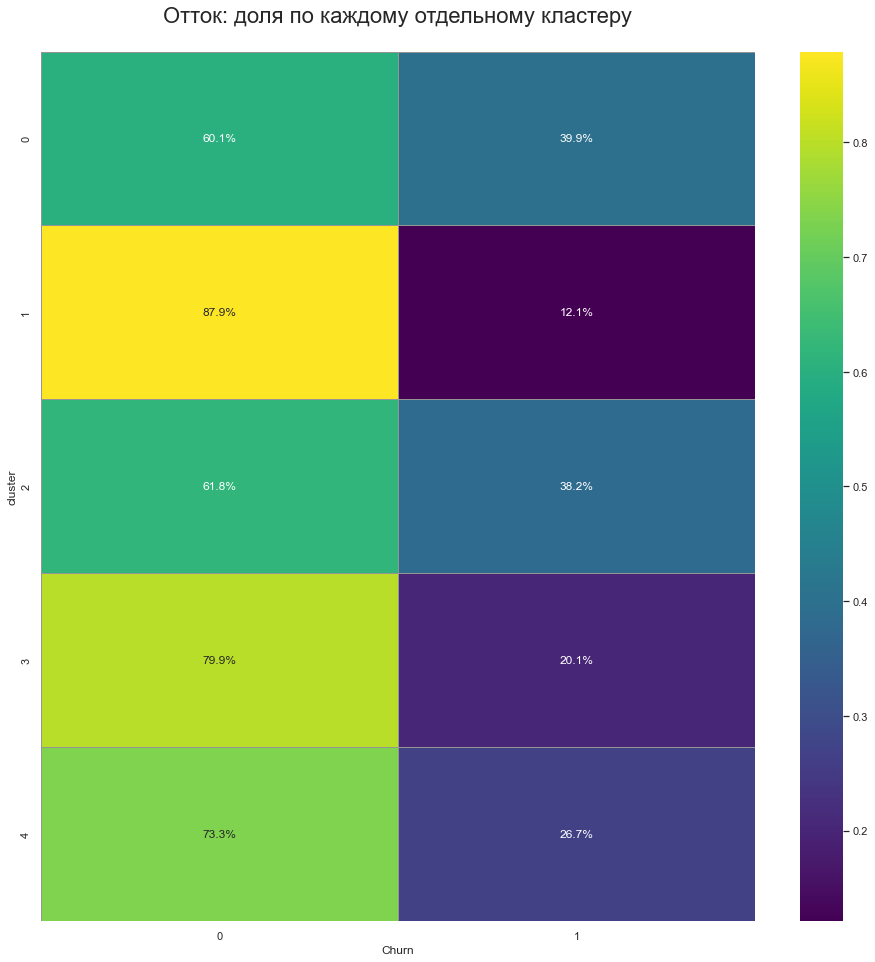

In [64]:
sns.heatmap(pd.crosstab(columns=df['Churn'],
                        index=df.cluster,
                        normalize='index'),
            annot=True,
            fmt='.1%',
            linecolor='#959595',
            cmap='viridis',
            linewidths=.5)

plt.title('Отток: доля по каждому отдельному кластеру\n',
          fontdict=({'size': 22}))
plt.show()

У кластера 0 самый высокий отток - почти 40%. Далее следует кластер 2 - 38.2%. У 1 - самый маленький, всего 12%. 

### Распределения признаков для кластеров

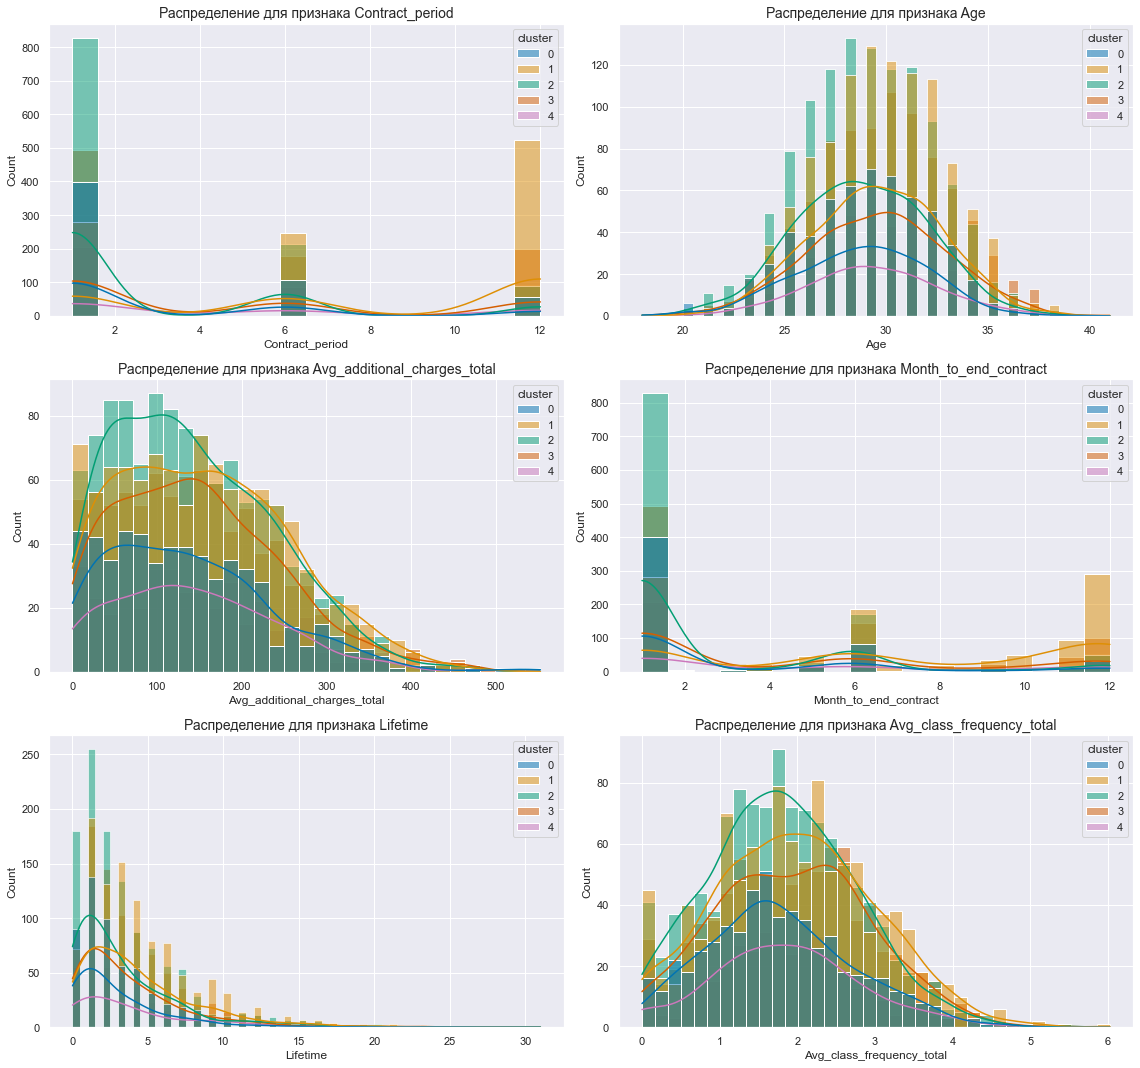

In [65]:
fig,axes = plt.subplots(3, 2,figsize=(16,15))
axes = axes.ravel()

for i, ax in zip(column_list,axes):
    sns.histplot(data=df, x=df[i], ax=ax, palette='colorblind', hue='cluster', kde=True)
    ax.set_title('Распределение для признака ' + i, fontsize=14)
    
fig.tight_layout()
plt.show()

У аутсайдеров по оттоку 0 и 2 кластеров 
 - больше всего контрактов на месяц, меньше на 6 и почти нет на 12 месяцев
 - практически нет болших трат на дополнительные услуги клуба
 - остаётся менььше 2 месяцев до конца договора
 - лайфтайм клиентов резко уменьшается после 2 месяца.
 - частота тренировок в неделю сколняется к левой части графика сильнее, в отличие от тех кластеров, где churn ниже.

In [66]:
bi_column_list = bi_cols.columns

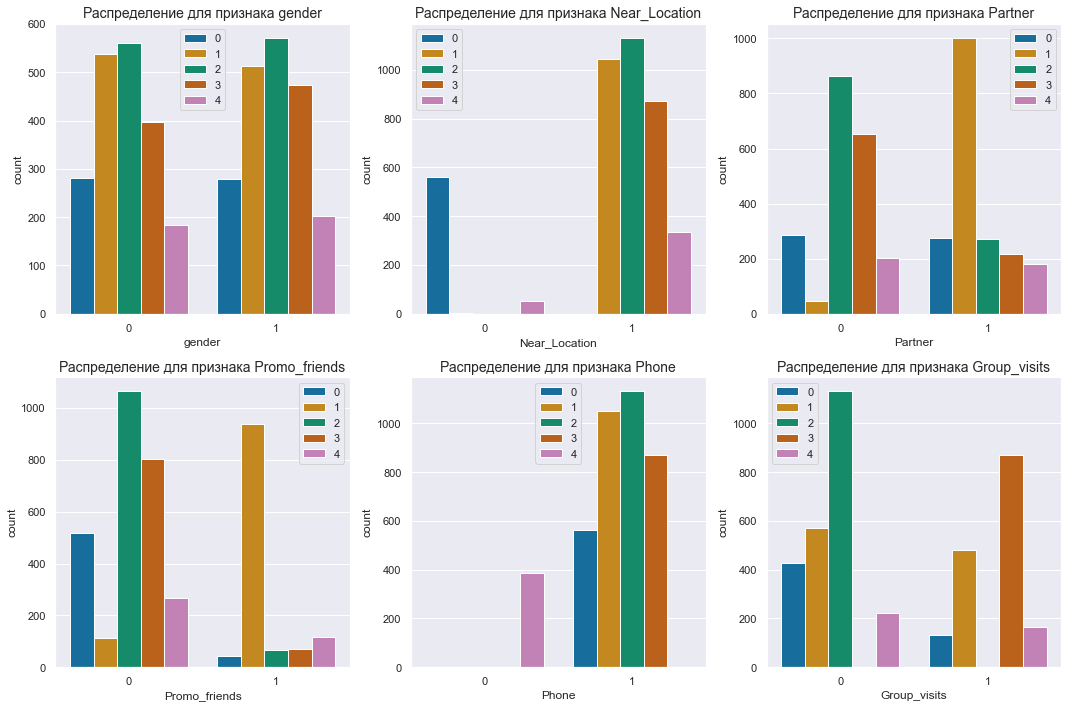

In [67]:
fig,axes = plt.subplots(2,3,figsize=(15,10))

axes_list = [item for sublist in axes for item in sublist]
for i in bi_column_list:
    ax=axes_list.pop(0)
    sns.countplot(data=df, x=i, ax=ax, palette='colorblind', hue='cluster')
    ax.set_title('Распределение для признака ' + i, fontsize=14)
    ax.legend()
fig.tight_layout()
plt.show()

## Вывод

Мы изучили данные клиентов сети фитнес - центров. Проверили данные на отсутствие пропусков. Изучили средние значения и стандартные отклонения. Анализ показал, что в данных представлено примерно поровну клиентов обоих полов, большая часть (85%) клиентов живёт неподалеку от фитнес - центров, примерно половина из всех клиентов является сотрудниками компании - партнёра, 30% клиентов пришли по знакомству или по акции, 40% клиентов ходят на групповые занятия. Средний возраст клиента - 29 лет, максимальный - 41. В среднем lifetime клиента 3.7 месяца медиана - три ровно. Среднее посещение составляет 1.9 занятий в неделю. Максимальное количество тренировок - 6. Средние траты на доп услуги 147 руб, что несколько больше медианы. Это свидетельствует от том, что есть немного но очень больших трат.

Отток клиентов в текущем месяце составляет 26%.

Мы построили графики распределение признаков и увидели, что те, кто остался - в среднем старше и тратят больше на дополнительные услуги клуба и регулярно посещают по 2 тренировки в неделю. lifetime тех, кто остался составляет 4.7 месяцев. В среднем те, кто остаются находятся в начале своего абонемента - 5.3 месяца до конца абонемента дисциплинируют. В среднем уходят клиенты после 1 месяца посещения. Это похоже на тех, что начал новую жизнь с понедельника и забросил, не доведя до какого-то результата. У ушедших в среднем меньше двух месяцев до конца срока действия абонемента. На графике также видно, что те, кто ушел, редко берут долгие абонементы. Одна наоборот, редко уходят, когда остаётся много месяцев в абонементе.

Затем при помощи модели k-means мы разделили всех клиентов на 5 кластеров и выделили топ признаков, которые влияют сильнее всего на отток.

Отчего зависит маленький отток клиентов?
 - от близости жизни к фитнес-центрам
 - наличия абонемента от компании
 - возможность прийти по промо или рекомендации
 - участие в групповых тренировках

На отток не влияют:
 - пол
 - факт наличия номера телефона в анкете


Рекомендации для стратегии взаимодействия с клиентами и их удержания.
 - Стоит обратить особое внимание на клиентов, у которых подходит срок договора (около 3 мес до окончания). Таким клиентам стоит сделать рассылку и предложить продолжить абонемент на более долгий срок на более выгодных условиях
 - У клиентов, которые живут неподалеку хороший уровень удержания, поэтому стоит привлекать клиентов и при помощи таргетированной рекламы
 - Стоит и дальше развивать корпоративное направление, через месяц, 6 и 12 мес можно повторять запрос и напоминать о выгодных абонементах от компании.